In [1]:
import os, shutil

base_dir = '정규화원본'


train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


train_0_dir = os.path.join(train_dir, '0')
train_1_dir = os.path.join(train_dir, '1')
train_2_dir = os.path.join(train_dir, '2')
train_3_dir = os.path.join(train_dir, '3')
train_4_dir = os.path.join(train_dir, '4')
train_5_dir = os.path.join(train_dir, '5')
train_6_dir = os.path.join(train_dir, '6')
train_7_dir = os.path.join(train_dir, '7')
train_8_dir = os.path.join(train_dir, '8')
train_9_dir = os.path.join(train_dir, '9')


validation_0_dir = os.path.join(validation_dir, '0')
validation_1_dir = os.path.join(validation_dir, '1')
validation_2_dir = os.path.join(validation_dir, '2')
validation_3_dir = os.path.join(validation_dir, '3')
validation_4_dir = os.path.join(validation_dir, '4')
validation_5_dir = os.path.join(validation_dir, '5')
validation_6_dir = os.path.join(validation_dir, '6')
validation_7_dir = os.path.join(validation_dir, '7')
validation_8_dir = os.path.join(validation_dir, '8')
validation_9_dir = os.path.join(validation_dir, '9')


test_0_dir = os.path.join(test_dir, '0')
test_1_dir = os.path.join(test_dir, '1')
test_2_dir = os.path.join(test_dir, '2')
test_3_dir = os.path.join(test_dir, '3')
test_4_dir = os.path.join(test_dir, '4')
test_5_dir = os.path.join(test_dir, '5')
test_6_dir = os.path.join(test_dir, '6')
test_7_dir = os.path.join(test_dir, '7')
test_8_dir = os.path.join(test_dir, '8')
test_9_dir = os.path.join(test_dir, '9')

In [2]:
print('훈련용 0 이미지 전체 개수 : ', len(os.listdir(train_0_dir)))

print('검증용 0 이미지 전체 개수 : ', len(os.listdir(validation_0_dir)))

print('테스트용 0 이미지 전체 개수 : ', len(os.listdir(test_0_dir)))


훈련용 0 이미지 전체 개수 :  5000
검증용 0 이미지 전체 개수 :  1600
테스트용 0 이미지 전체 개수 :  2300


In [4]:
from keras import layers
from keras import models
from keras.layers import Dropout
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',
                       input_shape=(50,50,3)))
#model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.25))
# model.add(layers.Conv2D(128,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(128,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

W1023 14:07:52.930699 19904 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\backend\tensorflow_backend.py:149: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1023 14:07:52.942667 19904 deprecation.py:506] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\backend\tensorflow_backend.py:3740: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])


W1023 14:07:59.150588 19904 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1023 14:07:59.208432 19904 deprecation_wrapper.py:119] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\keras-2.2.5-py3.7.egg\keras\backend\tensorflow_backend.py:3583: The name tf.log is deprecated. Please use tf.math.log instead.



In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, #타깃 디렉터리
                                                    target_size=(50,50), #모든 이미지 150X150으로 변경
                                                    batch_size=32, #
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(50,50),batch_size=32, class_mode='categorical')

Found 50000 images belonging to 10 classes.
Found 16000 images belonging to 10 classes.


In [7]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=50,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=25)

W1023 14:10:54.640042 19904 deprecation.py:323] From C:\Users\SH\Anaconda3\envs\AI\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
50/50 [==============================] - 10s 199ms/step - loss: 2.3834 - acc: 0.1244 - val_loss: 2.2848 - val_acc: 0.0800
Epoch 2/100
50/50 [==============================] - 4s 72ms/step - loss: 2.0646 - acc: 0.3412 - val_loss: 1.8476 - val_acc: 0.3975
Epoch 3/100
50/50 [==============================] - 4s 73ms/step - loss: 1.3005 - acc: 0.6325 - val_loss: 1.2315 - val_acc: 0.5763
Epoch 4/100
50/50 [==============================] - 4s 73ms/step - loss: 0.8894 - acc: 0.7256 - val_loss: 1.0766 - val_acc: 0.6775
Epoch 5/100
50/50 [==============================] - 4s 72ms/step - loss: 0.8717 - acc: 0.7488 - val_loss: 1.0270 - val_acc: 0.6587
Epoch 6/100
50/50 [==============================] - 4s 72ms/step - loss: 0.6776 - acc: 0.7869 - val_loss: 0.8748 - val_acc: 0.7350
Epoch 7/100
50/50 [==============================] - 4s 72ms/step - loss: 0.7155 - acc: 0.8037 - val_loss: 0.9742 - val_acc: 0.6837
Epoch 8/100
50/50 [==============================] - 4s 73ms/step - loss: 

50/50 [==============================] - 4s 72ms/step - loss: 0.1728 - acc: 0.9500 - val_loss: 0.3401 - val_acc: 0.9038
Epoch 63/100
50/50 [==============================] - 4s 72ms/step - loss: 0.1345 - acc: 0.9613 - val_loss: 0.3625 - val_acc: 0.8900
Epoch 64/100
50/50 [==============================] - 4s 71ms/step - loss: 0.1356 - acc: 0.9606 - val_loss: 0.2434 - val_acc: 0.9325
Epoch 65/100
50/50 [==============================] - 4s 72ms/step - loss: 0.1444 - acc: 0.9575 - val_loss: 0.3439 - val_acc: 0.9050
Epoch 66/100
50/50 [==============================] - 4s 71ms/step - loss: 0.1597 - acc: 0.9544 - val_loss: 0.3403 - val_acc: 0.8912
Epoch 67/100
50/50 [==============================] - 4s 72ms/step - loss: 0.1086 - acc: 0.9694 - val_loss: 0.3213 - val_acc: 0.9175
Epoch 68/100
50/50 [==============================] - 4s 71ms/step - loss: 0.1436 - acc: 0.9544 - val_loss: 0.2852 - val_acc: 0.9175
Epoch 69/100
50/50 [==============================] - 4s 77ms/step - loss: 0.0915 

In [8]:
model.save('number_feature.h5')

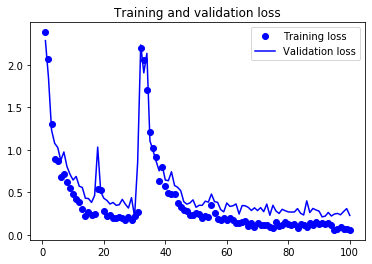

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

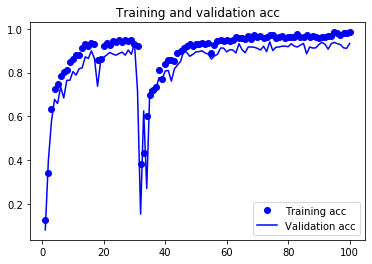

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.show()

[9]


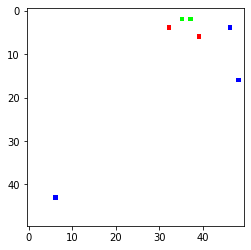

In [15]:
import glob
from PIL import Image
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K
from keras.models import load_model
model = load_model('number_feature.h5')
img_path='정규화원본/test/0/normalizationSF61527.bmp'
img = image.load_img(img_path,target_size=(50,50))
plt.imshow(img)

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=x/255.



    
prediction =model.predict_classes(x)
#prediction =model.predict(x)
print(prediction)
#np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [ ]:
layer_name = 'conv2d_12'
size = 64
margin = 5

results=np.zeros((8*size + 7*margin, 8*size + 7*margin, 3),dtype='uint8')#결과를 담을 빈 이미지 

for i in range(8): #행
    for j in range(8): #열
        filter_img = generate_pattern(layer_name, i+(j*8), size=size) #layer_name에 있는 i+(j*8)번째 필터에 대한 패턴을 생성
        
        horizontal_start = i*size + i*margin 
        horizontal_end = horizontal_start + size
        vertical_start = j*size + j*margin
        vertical_end = vertical_start + size
        
        results[horizontal_start : horizontal_end, vertical_start : vertical_end, :] = filter_img
        
plt.figure(figsize=(20, 20))
plt.imshow(results)

In [ ]:
#이미지의 어느 부분이 컨브넷의 최종분류 결정에 기여하였는지 이해하는데 유용
#클래스 활성화 맵 CAM
#특정 출력 클래스에 대해 입력 이미지의 모든 위치를 계산한 2D 점수 그리드 
#클래스에 대해 각 위치가 얼마나 중요한지 알려줌
#특성맵의 모든 채널 출력에 채널에 대한 클래스의 그래디언트 평균을 곱함
#입력이미지가 각 채널을 활성화 하는 정도
#클래스에 대한 각 채널의 중요도'
#입력 이미지가 클래스를 활성화 하는 정도


from keras import backend as K

model = load_model('number_recog.h5')

model.summary()

In [45]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path = '원본/test/4/원본61301.jpg'

img = image.load_img(img_path,target_size =(150,150))#224X224파이썬 이미징 라이브러리 객체로 변환 

x = image.img_to_array(img) #(224,224,3) 크기의 넘파이로 변환

x = np.expand_dims(x, axis=0)#차원을 추가하여 (1,224,224,3)크기의 배치로 배열을 변환
x = preprocess_input(x) #데이터를 전처리함( 채널별 컬러 정규화 수행)

In [46]:
preds = model.predict(x)

print('Predicted : ', decode_predictions(preds, top=3)[0])
#아프리카 코끼리(92.5%확률)
#코끼리(7%확률)
#인도코끼리(0.4%확률)

ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 10)